# Where do Severe Crashes Happen Often?

This section will use the Kernel Density Estimation (KDE) [@silverman1986density] and DBSCAN Clustering methods [@ester1996dbscan] to identify locations in San Francisco (SF) that see the highest amount of bike crashes. The KDE method combined with GeoPandas [@geopandas] will help visualize crash hotspots around SF. This analysis will continue with all severity of crashes to see if there are locations with greater severities than others.

It is important to note that it may be expected that more crashes will occur in locations where there is more bike/vehicle traffic. However, the infrastructure of the road should match the volume. Therefore, if a high-volume street is showing multiple crashes, that indicates that existing infrasturcture does not support the expected interactions, and infrastructure change would still be needed to address the higher crash occurances.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as ctx
from math import radians
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde
from shapely.geometry import Point

In [2]:
crashes = pd.read_csv("data/Crashes.csv")
crashes = crashes.dropna(subset=['POINT_X', 'POINT_Y'])

In [3]:
#Cleaning data set so that latitudinal and longitudinal outliers are ignored
crashes_clean = crashes[
    (crashes['POINT_X'] > -123) & (crashes['POINT_X'] < -121) &  # reasonable longitudes
    (crashes['POINT_Y'] > 37)   & (crashes['POINT_Y'] < 38.5) ].copy()   # reasonable latitudes

## Crash Severity
The following figures show the following:
1. All crashes for all years
2. Fatal Crashes
3. Crashes with Severe Injury
4. Crashes with Visible Injury
5. Crashes where there is a Complaint of  Pain

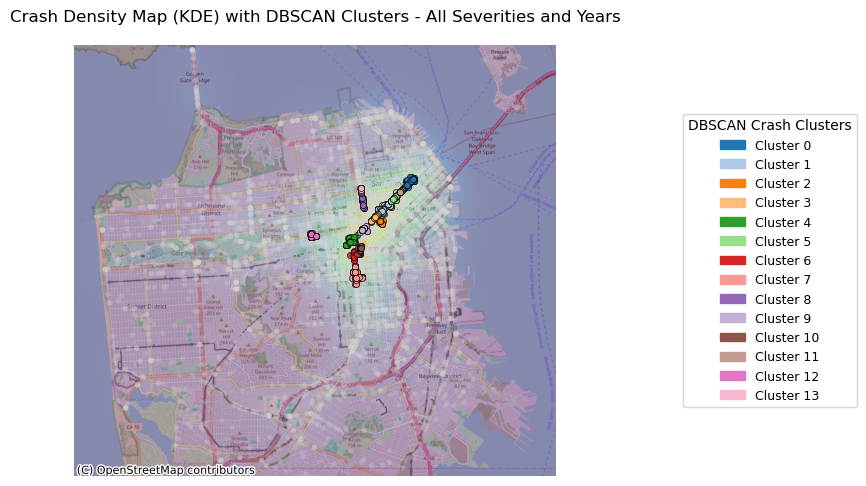

<Figure size 640x480 with 0 Axes>

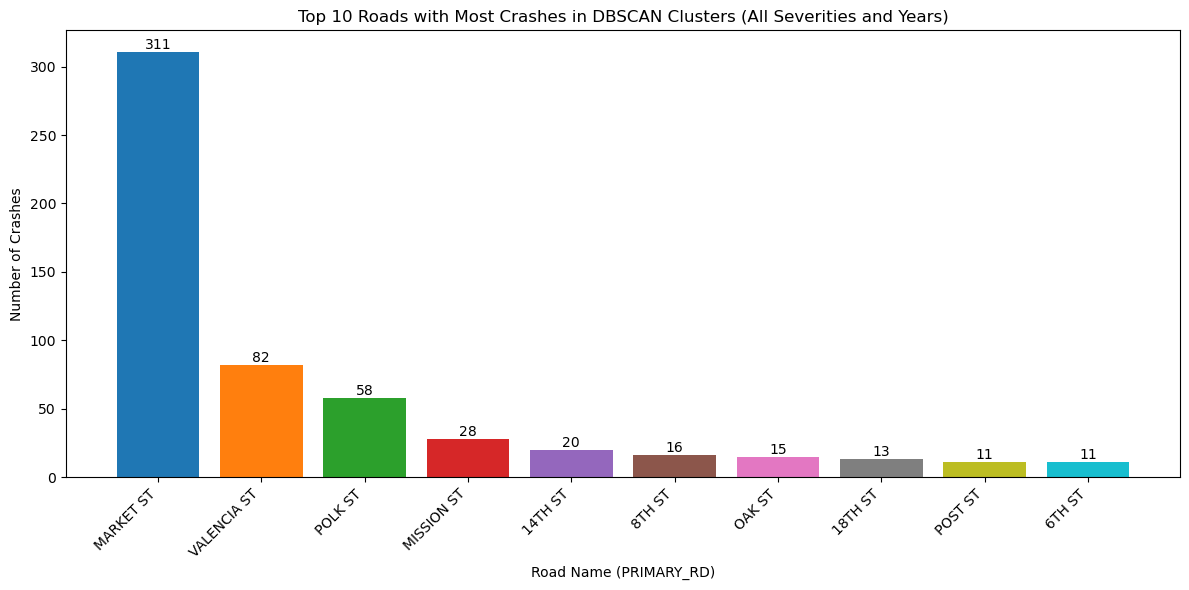

<Figure size 640x480 with 0 Axes>

In [4]:
from tools.KDE import plot_crash_clusters, plot_top_roads_bar

crashes_clustered = plot_crash_clusters(crashes_clean, severity=None, year=None, eps_meters=100, min_samples=25,
                        title_suffix="All Severities and Years")
plot_top_roads_bar(crashes_clustered, top_n=10, severity=None, year=None, title_suffix="All Severities and Years")

The figure above illustrates all bicycle crashes available in the TIMS data set that occured between 2014 and 2024. The first map shows that the highest density of crashes has occured in the downtown area of SF and the following bar graph indicates that there have been many crashes specifically on Market Street, which is corroborated by the map.

Now, lets break down these crashes by severity. Where do the most severe crashes occur? Is there another trend we can find?

/home/jovyan/project/final-group07/tools/KDE.py:103: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_noise.plot(ax=ax, color='lightgrey', markersize=15, alpha=0.25, edgecolor='none')


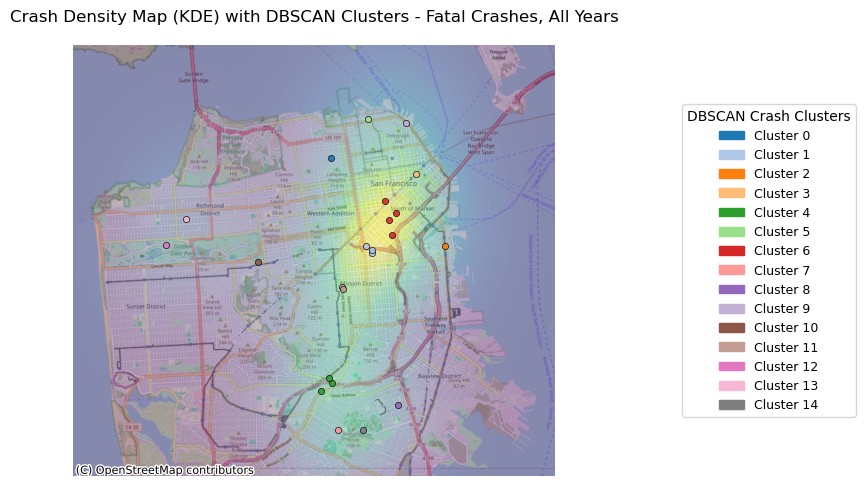

<Figure size 640x480 with 0 Axes>

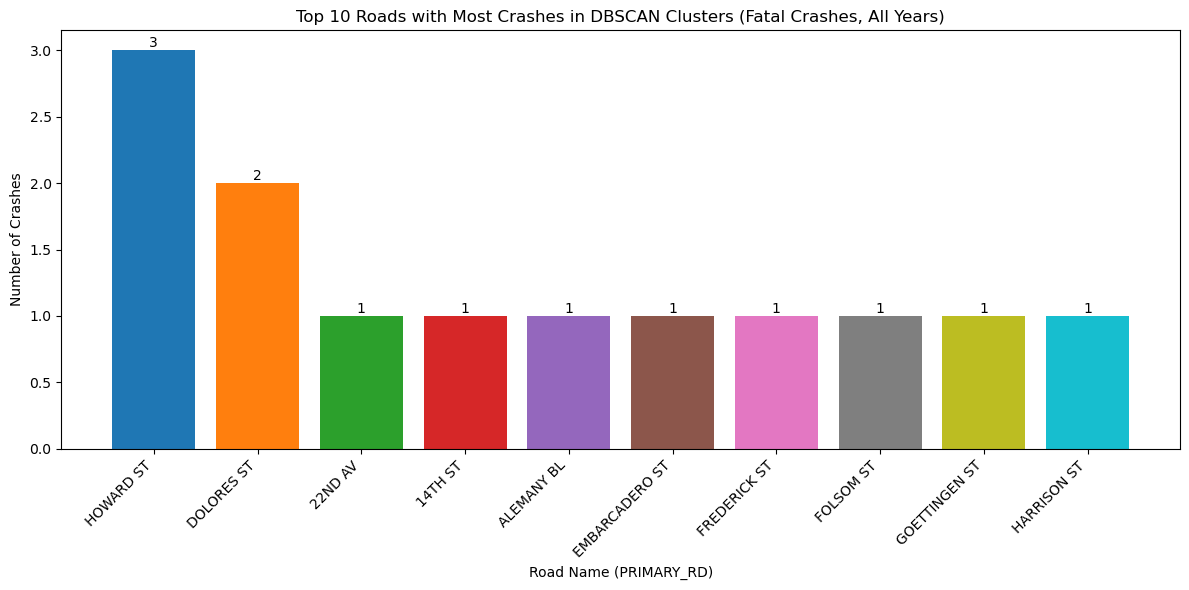

<Figure size 640x480 with 0 Axes>

In [5]:
fatal_crashes_clustered = plot_crash_clusters(crashes_clean, severity=1, year=None, eps_meters=500, min_samples=1,
                        title_suffix="Fatal Crashes, All Years")
plot_top_roads_bar(fatal_crashes_clustered, top_n=10, severity=None, year=None, title_suffix="Fatal Crashes, All Years")

Because there are so few fatal crashes, the minimum number of clusters for the analysis was set to 1 in order to visualize where the fatal crashes occured.

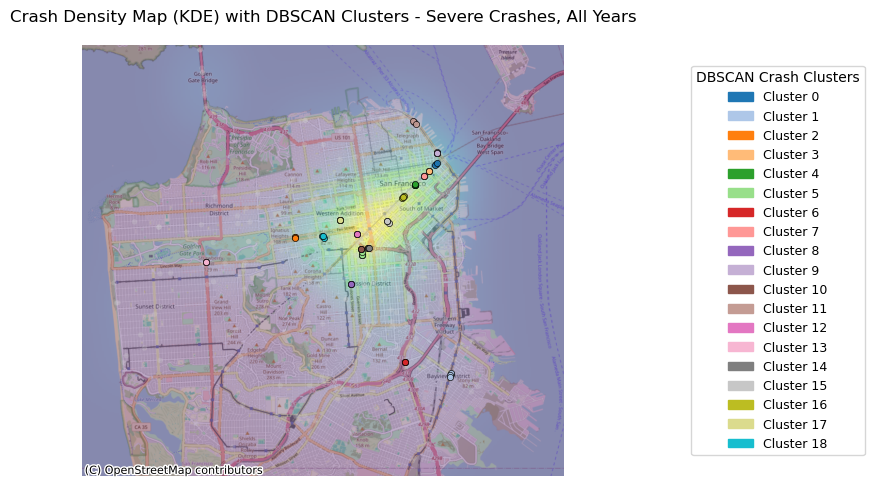

<Figure size 640x480 with 0 Axes>

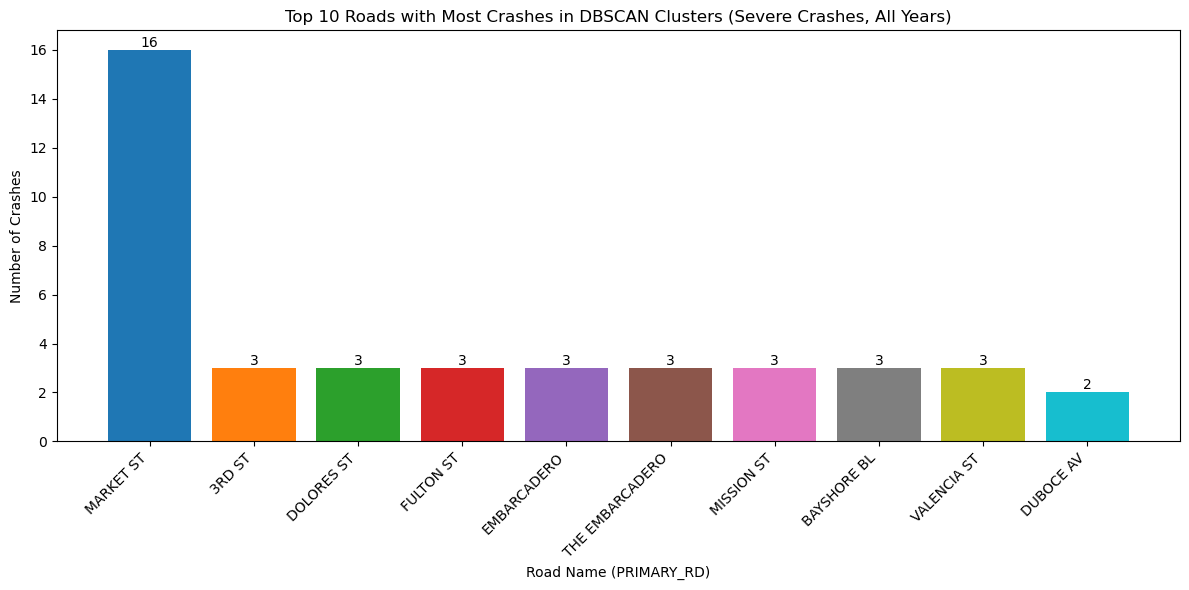

<Figure size 640x480 with 0 Axes>

In [6]:
severe_crashes_clustered = plot_crash_clusters(crashes_clean, severity=2, year=None, eps_meters=75, min_samples=3,
                        title_suffix="Severe Crashes, All Years")
plot_top_roads_bar(severe_crashes_clustered, top_n=10, severity=None, year=None, title_suffix="Severe Crashes, All Years")

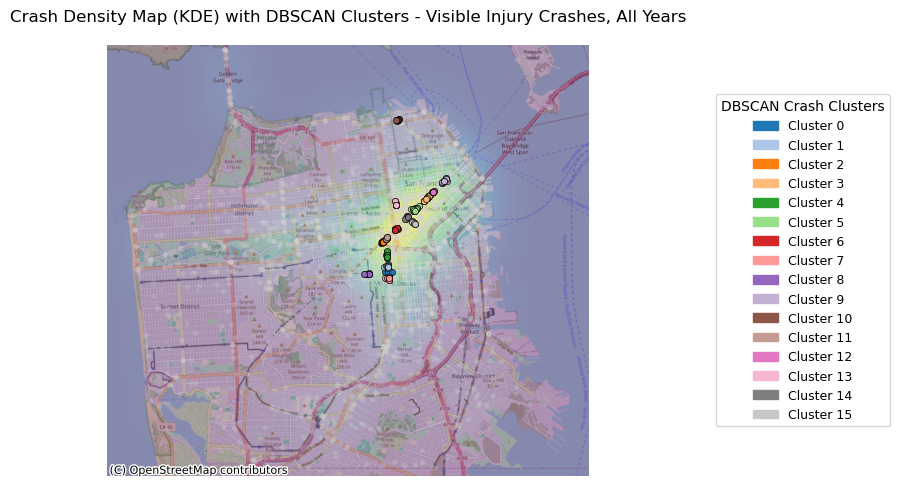

<Figure size 640x480 with 0 Axes>

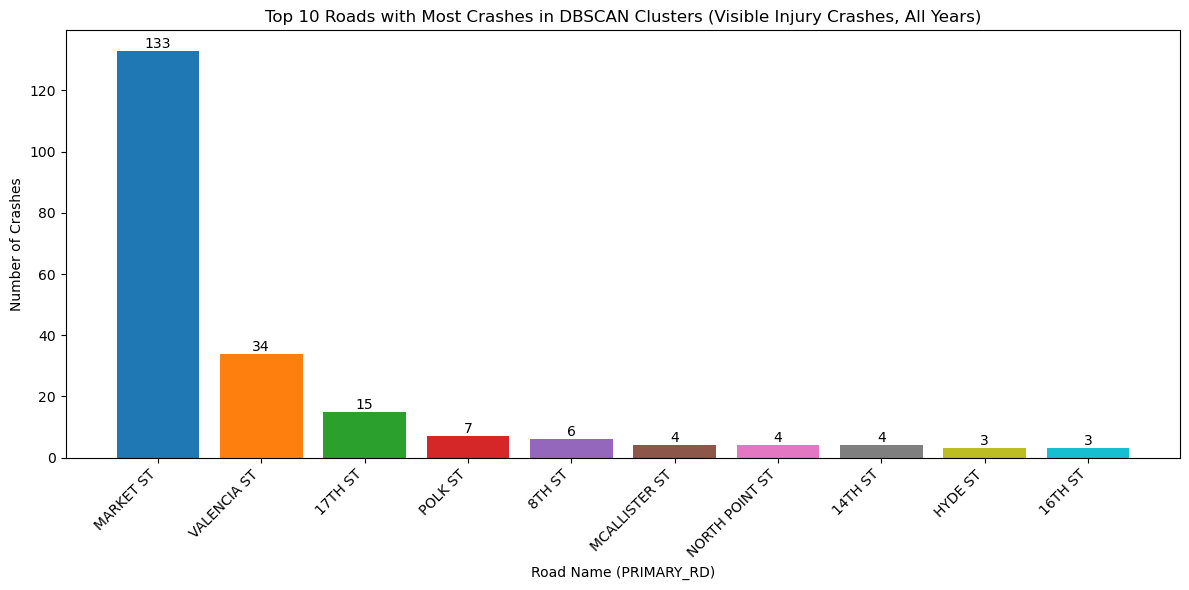

<Figure size 640x480 with 0 Axes>

In [7]:
injury_crashes_clustered = plot_crash_clusters(crashes_clean, severity=3, year=None, eps_meters=75, min_samples=10,
                        title_suffix="Visible Injury Crashes, All Years")
plot_top_roads_bar(injury_crashes_clustered, top_n=10, severity=None, year=None, title_suffix="Visible Injury Crashes, All Years")

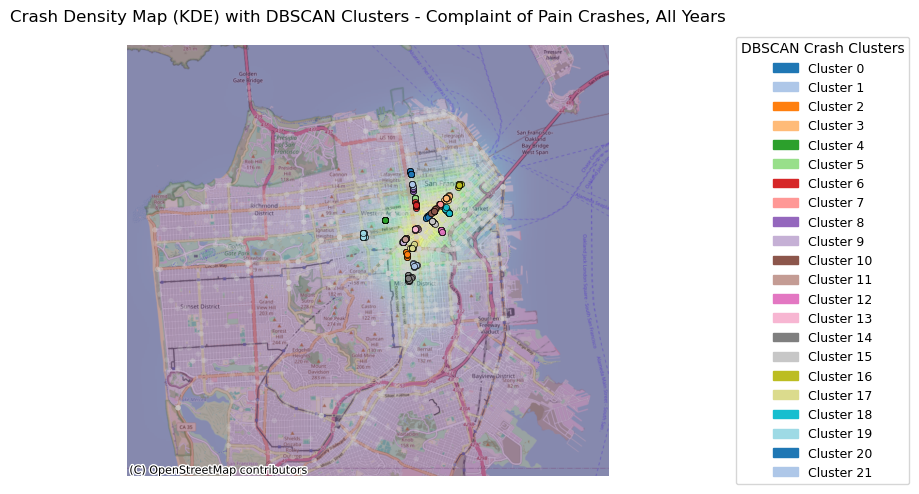

<Figure size 640x480 with 0 Axes>

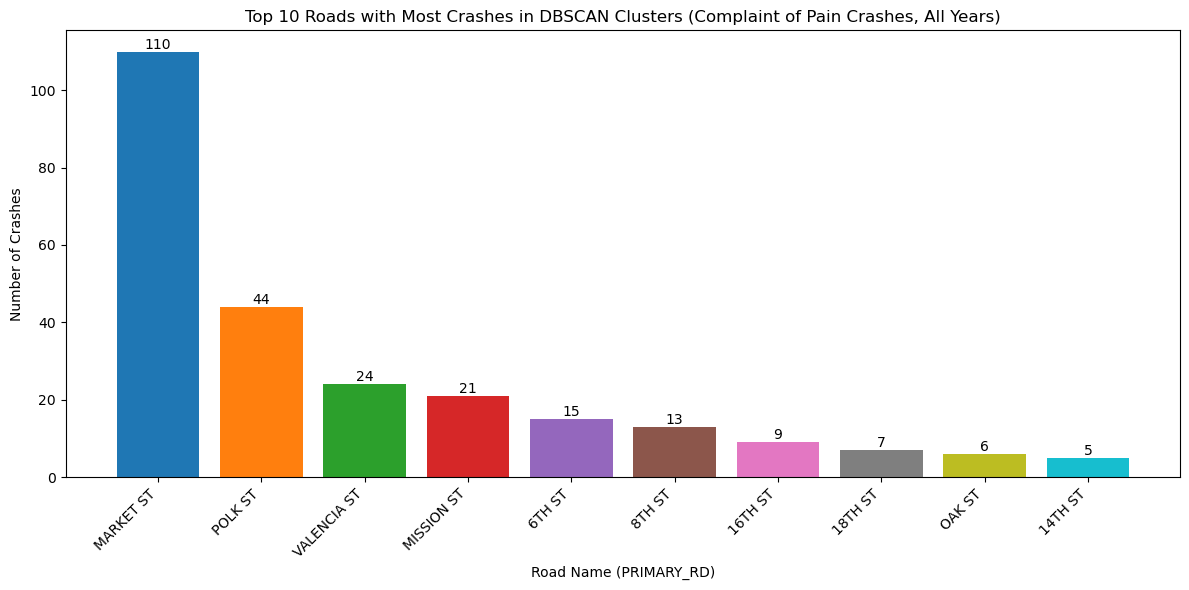

<Figure size 640x480 with 0 Axes>

In [8]:
cop_crashes_clustered = plot_crash_clusters(crashes_clean, severity=4, year=None, eps_meters=75, min_samples= 10,
                        title_suffix="Complaint of Pain Crashes, All Years")
plot_top_roads_bar(cop_crashes_clustered, top_n=10, severity=None, year=None, title_suffix="Complaint of Pain Crashes, All Years")

## Street Trends
The above graphs confirm a startling number of crashes densely clustered on Market Street. However, on January 29, 2020, Market Street was closed to motor vehicles, outside of emergency services and buses. We can see this difference in the two images below. One is from before January 29, 2020, and the other is from after this point.

```{image} KDE_images/MarketStPre.png
:width: 600px
:align: center

This is a picture of Market Street from before the vehicle ban. As shown in the photo, we see vehicles sharing space with bicyclists. These interactions increase the probablility of a crash.

```{image} KDE_images/MarketStPost.png
:width: 600px
:align: center



This is a picture of Market Street from after the vehicle ban. Less interaction between cars and bikes mean less chances of collision.

The change  means that interactions between cars and bikes are now almost zero, except for traffic crossing the street perpendicularly.  When we filter out crashes that occured after that date, we see the following.

In [9]:
# Turn to datetime format
crashes_clean['COLLISION_DATE'] = pd.to_datetime(
    crashes_clean['COLLISION_DATE'],
    errors='coerce'
)

# Filter crashes after 2020-01-29
crashes_recent = crashes_clean[
    crashes_clean['COLLISION_DATE'] > pd.Timestamp('2020-01-29')
]

/home/jovyan/project/final-group07/tools/KDE.py:103: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_noise.plot(ax=ax, color='lightgrey', markersize=15, alpha=0.25, edgecolor='none')


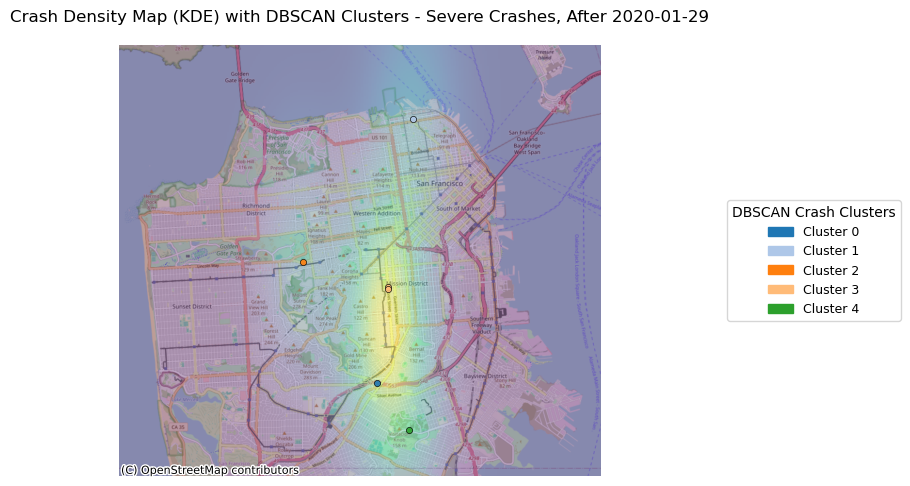

<Figure size 640x480 with 0 Axes>

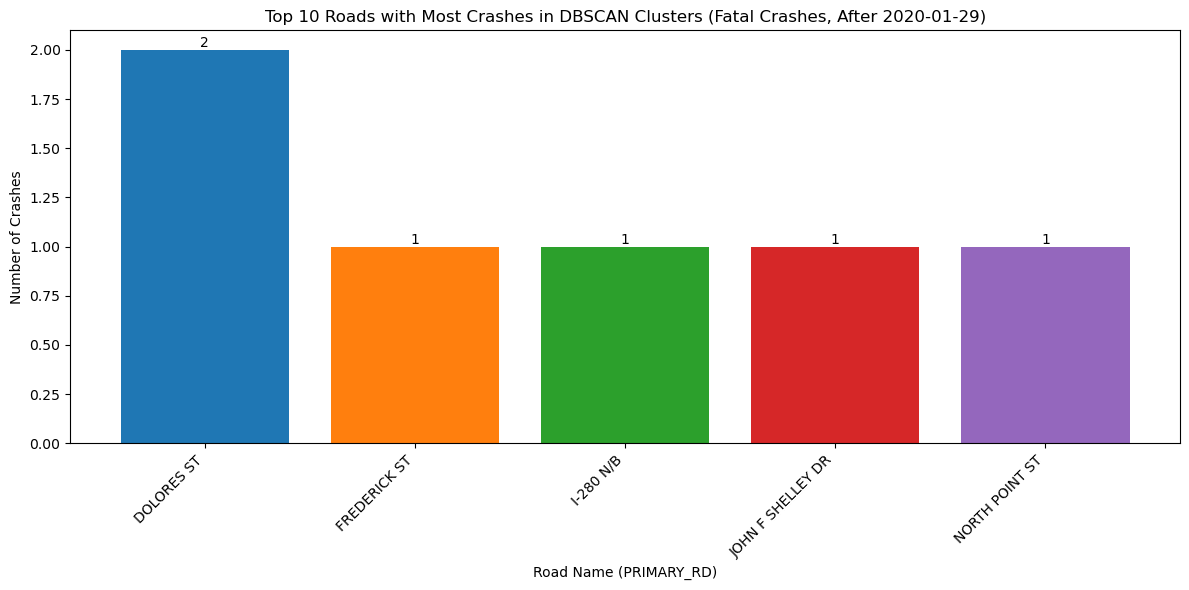

<Figure size 640x480 with 0 Axes>

In [10]:
fatal_recent_clustered = plot_crash_clusters(crashes_recent, severity=1, year=None, eps_meters=500, min_samples= 1,
                        title_suffix="Severe Crashes, After 2020-01-29")
plot_top_roads_bar(fatal_recent_clustered, top_n=10, severity=None, year=None, title_suffix="Fatal Crashes, After 2020-01-29")


Now that the time span has been decreased, there are even fewer crashes and the minimum number of clusters for the analysis was again set to 1 in order to visualize where the fatal crashes occured.

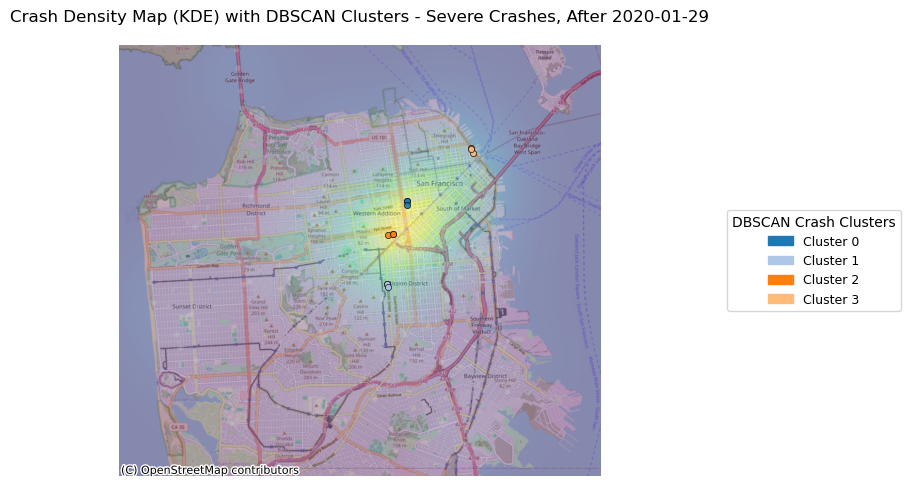

<Figure size 640x480 with 0 Axes>

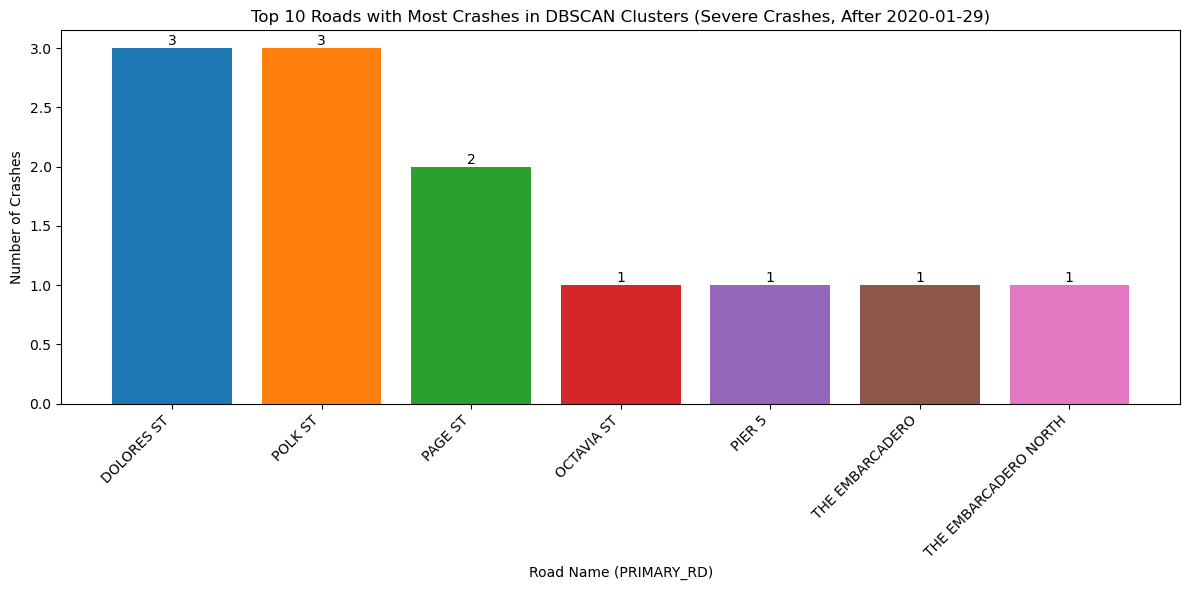

<Figure size 640x480 with 0 Axes>

In [11]:
severe_recent_clustered = plot_crash_clusters(crashes_recent, severity=2, year=None, eps_meters=150, min_samples= 3,
                        title_suffix="Severe Crashes, After 2020-01-29")
plot_top_roads_bar(severe_recent_clustered, top_n=10, severity=None, year=None, title_suffix="Severe Crashes, After 2020-01-29")


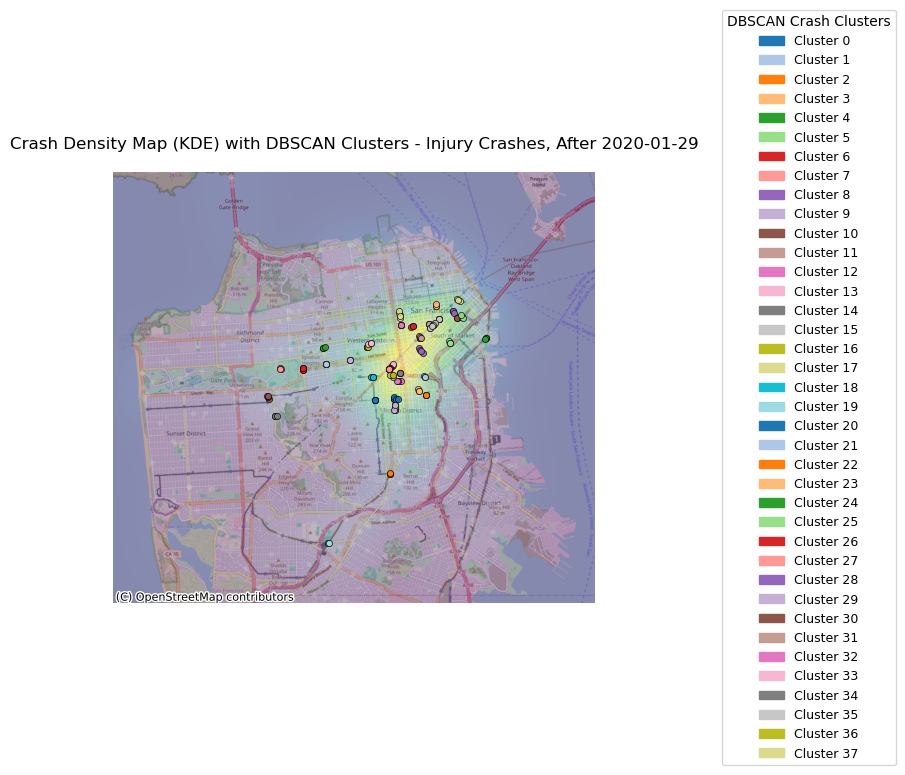

<Figure size 640x480 with 0 Axes>

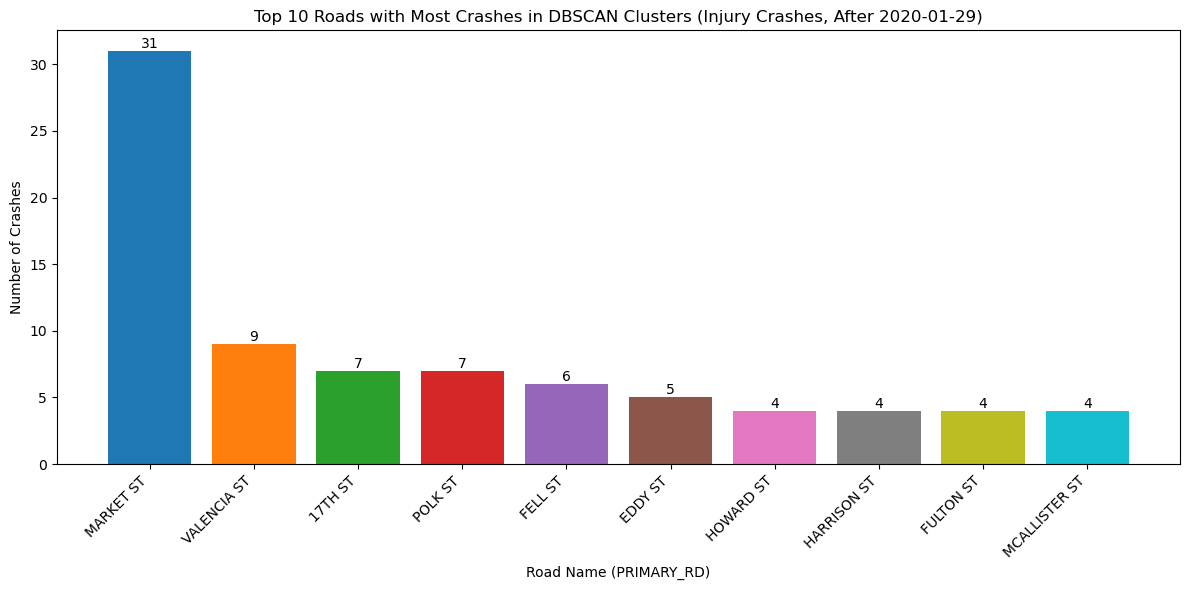

<Figure size 640x480 with 0 Axes>

In [12]:
injury_recent_clustered = plot_crash_clusters(crashes_recent, severity=3, year=None, eps_meters=75, min_samples= 3,
                        title_suffix="Injury Crashes, After 2020-01-29")
plot_top_roads_bar(injury_recent_clustered, top_n=10, severity=None, year=None, title_suffix="Injury Crashes, After 2020-01-29")


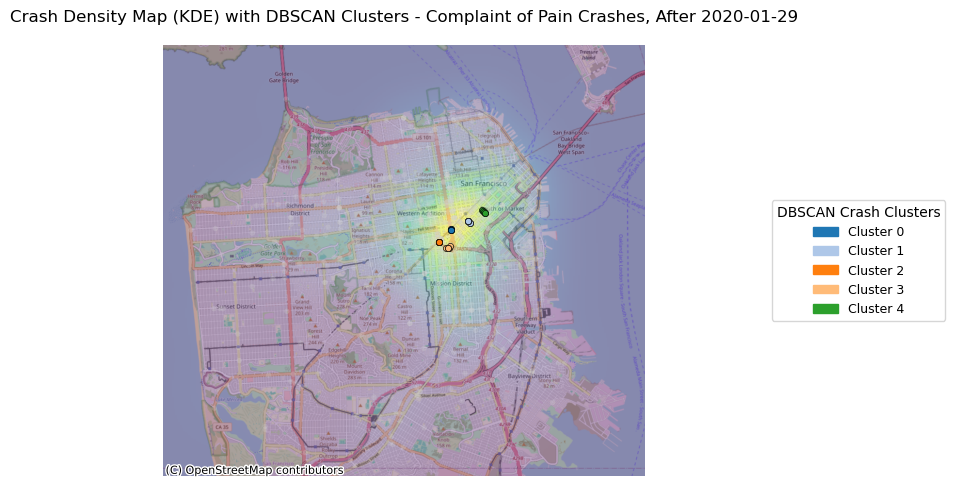

<Figure size 640x480 with 0 Axes>

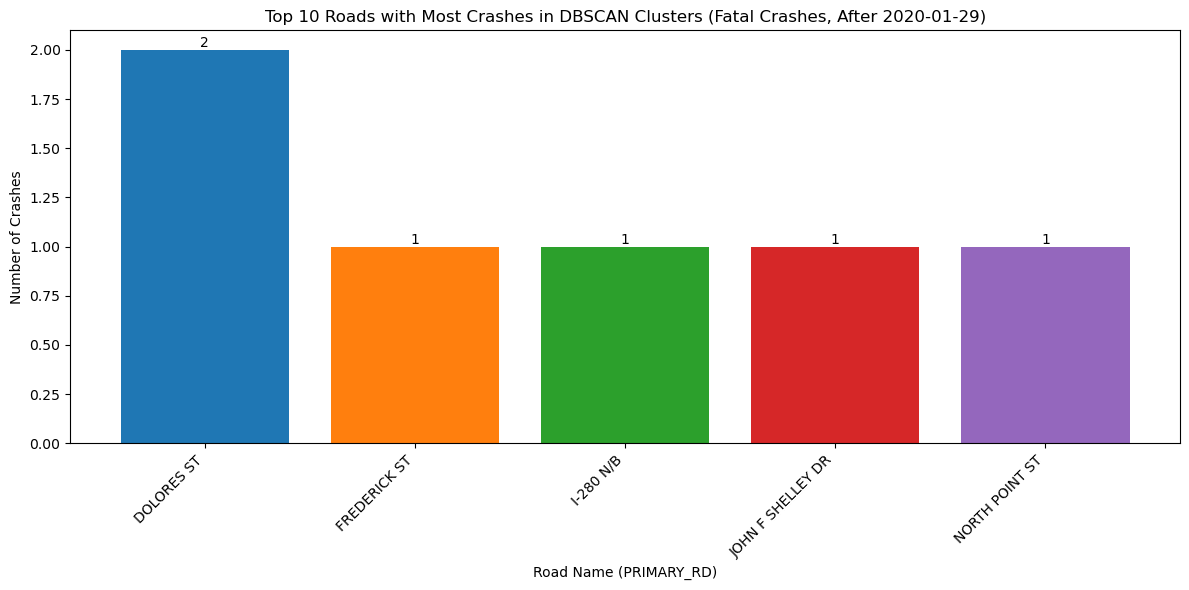

<Figure size 640x480 with 0 Axes>

In [13]:
cop_recent_clustered = plot_crash_clusters(crashes_recent, severity=4, year=None, eps_meters=75, min_samples= 5,
                        title_suffix="Complaint of Pain Crashes, After 2020-01-29")
plot_top_roads_bar(fatal_recent_clustered, top_n=10, severity=None, year=None, title_suffix="Fatal Crashes, After 2020-01-29")


With the change in vehicle allowance on Market Street, it is not surprising that Market Street no longer consistently comes up as a road with an exorbinant amount of crashes. Interestingly, it still appears to have many clustered crashes resulting in visible injuries. However, more consistently, we see roads such as Dolores Street, Frederick Street, and Polk Street. Even when looking at the data over all years, we can see that these three streets appear to have more crashes and are consistently flagged.
<br>
This indicates that there may be infrastructure characteristics that influence the propensity of bicycle crashes on these roads. 

```{image} KDE_images/DoloresSt.png
:width: 600px
:align: center

The above image shows Dolores Street, which does not have bike lanes or any protective considerations for those who may use different modes of travel such as bicycles, scooters, or skateboards. Dolores Street shows high levels of bicyclist fatalities and severe injuries since 2020. This trend may justify the need for greater bicycle safety considerations such as bike lanes.

```{image} KDE_images/FrederickSt.png
:width: 600px
:align: center

Similar to Dolores Street, Frederick Street also does not have bike lanes. Adding these protections and possibly other safety measures such as speed calming measures, more robust infrastructure, or greater signage could help decrease instances of bike collisions.

```{image} KDE_images/PolkSt.png
:width: 600px
:align: center

Polk Street has better bicycle infrastructure; however, it was inconsistent. Some of the bike lane has vertical infrastructure, while other places do not. Further, there are many access points along Polk, such as perpendicular streets and driveways. These are generally unsafe conditions as they create multiple possible interaction points where crashes may occur. Special design considerations should be made that could protect cyclists. Making this street a slow street could be the best way to ensure that any collision that does happen is of the lowest severity.

Photo Credit: Google Maps